# Decision Trees

In this notebook we examine in details some of the properties of the Decision Trees. In this example we employ Decision Trees to solve regression problems. According to the machine learning terminology, this is also called a Regression Tree.

The notebook is divided into four parts:

1. Preparation of an elementary dataset. This derives from our well-known Boston dataset and will consist of 5 training examples.
2. Manual calculation of the elements (stumps, nodes, leaves) of the tree with operations "on paper".
3. Calculation of the elements (stumps, nodes, leaves) of the tree with our own code, in order to verify the correctness of the operations of the previous part.
4. Verification of the correctness of the previous two parts through the [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) of scikit-learn. 


In [1]:
from IPython.display import Image
from IPython.core.display import HTML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston

from sklearn.tree import DecisionTreeRegressor

pd.set_option("display.precision", 3)


## Boston dataset

Boston dataset is a toy dataset of scikit-learn that includes the prices (namely, the target) variables of 506 houses of Boston with respect to 13 features (input variables).


In [2]:
# Load Boston dataset into a dataset object.
dataset = load_boston()

# Copy the input variables to a Pandas dataframe.
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Copy the output variables in the last column of the aforementioned dataframe.
df['MEDV'] = dataset.target

df.head()


C:\Users\Leo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90,4.98,24.0
1,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.90,9.14,21.6
2,0.027,0.0,7.07,0.0,0.469,7.185,61.1,4.967,2.0,242.0,17.8,392.83,4.03,34.7
3,0.032,0.0,2.18,0.0,0.458,6.998,45.8,6.062,3.0,222.0,18.7,394.63,2.94,33.4
4,0.069,0.0,2.18,0.0,0.458,7.147,54.2,6.062,3.0,222.0,18.7,396.90,5.33,36.2


## Data preparation

We will build a regression tree by hand. To facilitate the presentation we will limit the dataset to 10 samples with 3 features. Of these 10 samples, 5 will be used as training examples. Eventually, the regression tree will be trained with a $ 5 \times 3$ data set.


In [3]:
# We randomly pick 10 samples from the dataframe
df_sam = df.sample(n=10, axis='index', random_state=1)

# We copy 3 features to df_sam_X
df_sam_X = df_sam[['AGE', 'PTRATIO', 'LSTAT']].copy()

# We copy the target variables to df_sam_Y
df_sam_Y = df_sam['MEDV']

#df_sam
df_sam_X
#df_sam_Y


,AGE,PTRATIO,LSTAT
307,70.3,18.4,7.53
343,56.4,17.6,7.18
47,85.5,17.9,18.80
67,21.4,18.9,8.10
362,96.2,20.2,10.19
132,97.9,21.2,11.12
292,23.4,19.2,4.70
31,100.0,21.0,13.04
218,93.8,16.4,17.92
90,66.1,17.8,8.81


In [4]:
X = df_sam_X.to_numpy()
Y = df_sam_Y.to_numpy()

# Here we equally split the dataset into a training set (with 5 samples) and a test set (also with 5 samples)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state=1)

X_train, Y_train

(array([[ 21.4 ,  18.9 ,   8.1 ],
        [ 56.4 ,  17.6 ,   7.18],
        [100.  ,  21.  ,  13.04],
        [ 93.8 ,  16.4 ,  17.92],
        [ 97.9 ,  21.2 ,  11.12]]),
 array([22. , 23.9, 14.5, 21.5, 23. ]))

<table>
    <caption><b>Table 1: </b>The training set.</caption>
<tr>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Example</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_0$</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_1$</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_2$</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$Y$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">1</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,1} = 21.4$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{1,1} = 18.9$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{2,1} = 8.1$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_1 = 22.0$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">2</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,2} = 56.4$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{1,2} = 17.6$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{2,2} = 7.18$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_2 = 23.9$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">3</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,3} = 100$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{1,3} = 21$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{2,3} = 13.04$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_3 = 14.5$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">4</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,4} = 93.8$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{1,4} = 16.4$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{2,4} = 17.92$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_4 = 21.5$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">5</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,5} = 97.9$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{1,5} = 21.2$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{2,5} = 11.12$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_5=23.0$</td>
</tr>
</table>


## Manual training

We will now train a regression tree by hand, based on the 5 training examples in the `X_train` array. Then we will verify the correctness of our calculations with the output of the DecisionTreeRegressor model of scikit-learn.

Our dataset has 3 features: $x_0$, $x_1$ and $x_2$. Moreover, $x_{i, j}$ and $Y_j$ represent the $i$-th the feature and the output variable of the $j$-th the training example. We have to study the features one by one, calculate the optimal stump per feature and finally, choose the one that returns the smallest error. In other words, we need to complete the following Table: 

<table>
    <caption><b>Table 2: </b>The best stumps per feature accompanied by the decision condition.</caption>
<tr>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Feature</td>
    <td style="width:500px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Best stump</td>
    <td style="width:150px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Condition</td>
    <td style="width:150px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">MSE</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">$x_0$</td>
    <td style="text-align:center; border:1px solid #333;"></td>
    <td style="text-align:center; border:1px solid #333;"></td>
    <td style="text-align:center; border:1px solid #333;"></td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">$x_1$</td>
    <td style="text-align:center; border:1px solid #333;"></td>
    <td style="text-align:center; border:1px solid #333;"></td>
    <td style="text-align:center; border:1px solid #333;"></td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">$x_2$</td>
    <td style="text-align:center; border:1px solid #333;"></td>
    <td style="text-align:center; border:1px solid #333;"></td>
    <td style="text-align:center; border:1px solid #333;"></td>
</tr>
</table>


### Depth 1, Feature 0 ($x_{0}$)

We sort the dataset in increasing $x_{0}$ order:

<table>
    <caption><b>Table 3: </b>The training set of Table 1 ordered by $x_0$.</caption>
<tr>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Example</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_0$</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_1$ (ignored)</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_2$ (ignored)</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$Y$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">1</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,1} = 21.4$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{1,1} = 18.9$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{2,1} = 8.1$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_1 = 22.0$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">2</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,2} = 56.4$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{1,2} = 17.6$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{2,2} = 7.18$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_2 = 23.9$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">3</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,3} = 93.8$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{1,3} = 16.4$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{2,3} = 17.92$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_3 = 21.5$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">4</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,4} = 97.9$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{1,4} = 21.2$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{2,4} = 11.12$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_4=23.0$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">5</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,5} = 100$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{1,5} = 21$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{2,5} = 13.04$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_5 = 14.5$</td>
</tr>
</table>

There are 5 examples in the dataset. Therefore, we have 4 split points that are placed exactly in the middle between two consecutive points. Consequently, we have 4 stumps and each one of them has three attributes:

* The split point,
* The level value $\overline{Y_L}$ at the left of the split point,
* The level value $\overline{Y_R}$ at the right of the split point.

Each of these 4 stumps, if selected, is accompanied by an error. From these four will be chosen the one that leads to the smallest error.

<table>
    <caption><b>Table 4: </b>The stumps for the feature $x_0$. The fourth stump has the smallest MSE, so it is considered the best for this feature.</caption>
<tr>
    <td style="width:110px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;" colspan="2">&nbsp;</td>
    <td style="width:225px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Pair $(x_{0,1}, x_{0,2}) = (21.4, 56.4)$</td>
    <td style="width:225px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Pair $(x_{0,2}, x_{0,3}) = (56.4, 93.8)$</td>
    <td style="width:225px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Pair $(x_{0,3}, x_{0,4}) = (93.8, 97.9)$</td>
    <td style="width:225px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Pair $(x_{0,4}, x_{0,5}) = (97.9, 100)$</td>
</tr>

<tr>
    <td style="text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" colspan="2">Chart</td>
    <td style="text-align:center; border:1px solid #333;"><img src="img/x0_stump1_root.png" width="220"></td>
    <td style="text-align:center; border:1px solid #333;"><img src="img/x0_stump2_root.png" width="220"></td>
    <td style="text-align:center; border:1px solid #333;"><img src="img/x0_stump3_root.png" width="220"></td>
    <td style="text-align:center; border:1px solid #333;"><img src="img/x0_stump4_root.png" width="220"></td>
</tr>

<tr>
    <td style="text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" colspan="2">Split Point $S$</td>
    <td style="text-align:center; border:1px solid #333;">$S_1 = (x_{0,1} + x_{0,2}) / 2 = 38.9$</td>
    <td style="text-align:center; border:1px solid #333;">$S_2 = (x_{0,2} + x_{0,3}) / 2 = 75.1$</td>
    <td style="text-align:center; border:1px solid #333;">$S_3 = (x_{0,3} + x_{0,4}) / 2 = 95.85$</td>
    <td style="text-align:center; border:1px solid #333;">$S_4 = (x_{0,4} + x_{0,5}) / 2 = 98.95$</td>
</tr>

<tr>
    <td style="width:40px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" rowspan="2">Left</td>
    <td style="width:70px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;">Level $\overline{Y_L}$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{L_1}} = Y_1 = 22.0$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{L_2}} = (Y_1 + Y_2)/2=22.95$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{L_3}} = (Y_1 + Y_2 + Y_3)/3 = 22.46$</td>
    <td style="text-align:center; border:1px solid #333; font-size:8pt">$\overline{Y_{L_4}} = (Y_1 + Y_2 + Y_3 + Y_4)/4=22.6$</td>
</tr>

<tr>
    <td style="width:70px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;">MSE $E_L$</td>
    <td style="text-align:center; border:1px solid #333;">$E_{L_1}=(Y_1 - \overline{Y_{L_1}})^2=0$</td>
    <td style="text-align:center; border:1px solid #333;">$E_{L_2}=\frac{1}{2}\big[(Y_1 - \overline{Y_{L_2}})^2 + (Y_2 - \overline{Y_{L_2}})^2\big ] = 0.90$</td>
    <td style="text-align:center; border:1px solid #333; font-size:8pt;">$E_{L_3}=\frac{1}{3}\big[(Y_1 - \overline{Y_{L_3}})^2+(Y_2 - \overline{Y_{L_3}})^2 + (Y_3 - \overline{Y_{L_3}})^2 \big ]=1.07$</td>
    <td style="text-align:center; border:1px solid #333; font-size:8pt;">$E_{L_4}=\frac{1}{4}\big[(Y_1 - \overline{Y_{L_4}})^2 + (Y_2 - \overline{Y_{L_4}})^2 + (Y_3 - \overline{Y_{L_4}})^2 + (Y_4 - \overline{Y_{L_4}})^2 \big ]=0.855$</td>
</tr>
    
<tr>
    <td style="width:40px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" rowspan="2">Right</td>
    <td style="width:70px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;">Level $\overline{Y_R}$</td>
    <td style="text-align:center; border:1px solid #333;font-size:8pt">$\overline{Y_{R_1}} = (Y_2 + Y_3 + Y_4 + Y_5)/4 = 20.7$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{R_2}} = (Y_3 + Y_4 + Y_5)/3=19.7$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{R_3}} = (Y_4 + Y_5)/2=18.75$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{R_4}} = Y_5 = 14.5$</td>
</tr>

<tr>
    <td style="width:70px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;">MSE $E_R$</td>
    <td style="text-align:center; border:1px solid #333; font-size:8pt;">$E_{R_1}=\frac{1}{4}\big[(Y_2 - \overline{Y_{R_1}})^2 + (Y_3 - \overline{Y_{R_1}})^2 + (Y_4 - \overline{Y_{R_1}})^2 + (Y_5 - \overline{Y_{R_1}})^2 \big ]=13.65$</td>
    <td style="text-align:center; border:1px solid #333; font-size:8pt;">$E_{R_2}=\frac{1}{3}\big[(Y_3 - \overline{Y_{R_2}})^2 + (Y_4 - \overline{Y_{R_2}})^2 + (Y_5 - \overline{Y_{R_2}})^2\big] = 13.72$</td>
    <td style="text-align:center; border:1px solid #333;">$E_{R_3}=\frac{1}{2}\big[(Y_4 - \overline{Y_{R_3}})^2 + (Y_5 - \overline{Y_{R_3}})^2\big]=18.06$</td>
    <td style="text-align:center; border:1px solid #333;">$E_{R_4}=(Y_5 - \overline{Y_{R_4}})^2=0$</td>
</tr>
<tr>
    <td style="text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" colspan="2">Total MSE $E$</td>
    <td style="text-align:center; border:1px solid #333;">$E_1 = E_{L_1} + E_{R_1}=0    + 13.65=13.65$</td>
    <td style="text-align:center; border:1px solid #333;">$E_2 = E_{L_2} + E_{R_2}=0.90 + 13.72=14.62$</td>
    <td style="text-align:center; border:1px solid #333;">$E_3 = E_{L_3} + E_{R_3}=1.07 + 18.06=19.13$</td>
    <td style="text-align:center; border:1px solid #333;">$E_4 = E_{L_4} + E_{R_4}=0.855+0=0.855$</td>
</tr>
</table>

From the last row in the above table we observe that the fourth stump (Split Point: $S=98.95$, Stump Levels: $\overline{Y_L}=22.6$, $\overline{Y_R}=14.5$) is the one that minimizes the error ($E=0.855$). So we can fill the second row of Table 2:

<table>
    <caption><b>Table 5: </b>The best stumps per feature accompanied by the decision condition.</caption>
<tr>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Feature</td>
    <td style="width:500px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Dest stump</td>
    <td style="width:150px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Condition</td>
    <td style="width:150px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">MSE</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">$x_0$</td>
    <td style="text-align:center; border:1px solid #333;">The fourth: Split Point: $S=98.95$, Stump Levels: $\overline{Y_L}=22.6$, $\overline{Y_R}=14.5$</td>
    <td style="text-align:center; border:1px solid #333;">$x_0 \leq 98.95$</td>
    <td style="text-align:center; border:1px solid #333;">$E=0.855$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">$x_1$</td>
    <td style="text-align:center; border:1px solid #333;"></td>
    <td style="text-align:center; border:1px solid #333;"></td>
    <td style="text-align:center; border:1px solid #333;"></td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">$x_2$</td>
    <td style="text-align:center; border:1px solid #333;"></td>
    <td style="text-align:center; border:1px solid #333;"></td>
    <td style="text-align:center; border:1px solid #333;"></td>
</tr>
</table>


### Depth 1, Feature 1 ($x_{1}$)

We sort the dataset in increasing $x_{1}$ order:

<table>
    <caption><b>Table 6: </b>The training set ordered by $x_1$.</caption>
<tr>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Example</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_0$ (ignored)</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_1$</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_2$ (ignored)</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$Y$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">1</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{0,1} = 93.8$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{1,1} = 16.4$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{2,1} = 17.92$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_1 = 21.5$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">2</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{0,2} = 56.4$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{1,2} = 17.6$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{2,2} = 7.18$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_2 = 23.9$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">3</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{0,3} = 21.4$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{1,3} = 18.9$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{2,3} = 8.1$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_3 = 22.0$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">4</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{0,4} = 100$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{1,4} = 21$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{2,4} = 13.04$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_4 = 14.5$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">5</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{0,5} = 97.9$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{1,5} = 21.2$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{2,5} = 11.12$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_5=23.0$</td>
</tr>
</table>

Then, we perform the same calculations as previously:

<table>
    <caption><b>Table 7: </b>The stumps for feature $x_1$. The fourth stump has the smallest MSE, so it is considered the best for this feature.</caption>
<tr>
    <td style="width:110px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;" colspan="2">&nbsp;</td>
    <td style="width:225px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Pair $(x_{1,1}, x_{1,2}) = (16.4, 17.6)$</td>
    <td style="width:225px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Pair $(x_{1,2}, x_{1,3}) = (17.6, 18.9)$</td>
    <td style="width:225px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Pair $(x_{1,3}, x_{1,4}) = (18.9, 21.0)$</td>
    <td style="width:225px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Pair $(x_{1,4}, x_{1,5}) = (21.0, 21.2)$</td>
</tr>

<tr>
    <td style="text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" colspan="2">Chart</td>
    <td style="text-align:center; border:1px solid #333;"><img src="img/x1_stump1_root.png" width="220"></td>
    <td style="text-align:center; border:1px solid #333;"><img src="img/x1_stump2_root.png" width="220"></td>
    <td style="text-align:center; border:1px solid #333;"><img src="img/x1_stump3_root.png" width="220"></td>
    <td style="text-align:center; border:1px solid #333;"><img src="img/x1_stump4_root.png" width="220"></td>
</tr>

<tr>
    <td style="text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" colspan="2">Split Point $S$</td>
    <td style="text-align:center; border:1px solid #333;">$S_1 = (16.4 + 17.6) / 2 = 17.0$</td>
    <td style="text-align:center; border:1px solid #333;">$S_2 = (17.6 + 18.9) / 2 = 18.25$</td>
    <td style="text-align:center; border:1px solid #333;">$S_3 = (18.9 + 21.0) / 2 = 19.95$</td>
    <td style="text-align:center; border:1px solid #333;">$S_4 = (21.0 + 21.2) / 2 = 21.1$</td>
</tr>

<tr>
    <td style="width:40px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" rowspan="2">Left</td>
    <td style="width:70px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;">Level $\overline{Y_L}$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{L_1}} = 21.5$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{L_2}} = (21.5+23.9)/2=22.7$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt">$\overline{Y_{L_3}} = (21.5+23.9+22.0)/3=22.46$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt">$\overline{Y_{L_4}} = (21.5+23.9+22.0+14.5)/4=20.48$</td>
</tr>

<tr>
    <td style="width:70px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;">MSE $E_L$</td>
    <td style="text-align:center; border:1px solid #333;">$E_{L_1}=(21.5-21.5)^2=0$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt;">$E_{L_2}=\frac{1}{2}\big[(21.5-22.7)^2+(23.9-22.7)^2\big ] = 1.44$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt;">$E_{L_3}=\frac{1}{3}\big[(21.5-22.46)^2+(23.9-22.46)^2+(22.0-22.46)^2 \big ]=1.07$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt;">$E_{L_4}=\frac{1}{4}\big[(21.5-20.48)^2+(23.9-20.48)^2+(22.0-20.48)^2+(14.5-20.48)^2 \big ]=12.7$</td>
</tr>
    
<tr>
    <td style="width:40px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" rowspan="2">Right</td>
    <td style="width:70px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;">Level $\overline{Y_R}$</td>
    <td style="text-align:center; border:1px solid #333;font-size:7pt">$\overline{Y_{R_1}} = (23.9+22.0+14.5+23.0)/4=20.85$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt">$\overline{Y_{R_2}} = (22.0+14.5+23.0)/3=19.83$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{R_3}} = (14.5+23.0)/2=18.75$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{R_4}} = 23.0$</td>
</tr>

<tr>
    <td style="width:70px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;">MSE $E_R$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt;">$E_{R_1}=\frac{1}{4}\big[(23.9-20.85)^2+(22.0-20.85)^2+(14.5-20.85)^2+(23.0-20.85)^2 \big ]=13.89$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt;">$E_{R_2}=\frac{1}{3}\big[(22.0-19.83)^2+(14.5-19.83)^2+(23.0-19.83)^2\big]=14.39$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt;">$E_{R_3}=\frac{1}{2}\big[(14.5-18.75)^2+(23.0-18.75)^2\big]=18.06$</td>
    <td style="text-align:center; border:1px solid #333;">$E_{R_4}=(23.0-23.0)^2=0$</td>
</tr>
<tr>
    <td style="text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" colspan="2">Total MSE $E$</td>
    <td style="text-align:center; border:1px solid #333;">$E_1 = E_{L_1} + E_{R_1}=0    + 13.65=13.89$</td>
    <td style="text-align:center; border:1px solid #333;">$E_2 = E_{L_2} + E_{R_2}=1.44 + 14.39=15.83$</td>
    <td style="text-align:center; border:1px solid #333;">$E_3 = E_{L_3} + E_{R_3}=1.07 + 18.06=19.13$</td>
    <td style="text-align:center; border:1px solid #333;">$E_4 = E_{L_4} + E_{R_4}=12.7+0=12.7$</td>
</tr>
</table>

From the last row in the above table we observe that the fourth stump (Split Point: $S=21.1$, Stump Levels: $\overline{Y_L}=20.48$, $\overline{Y_R}=23.0$) is the one that minimizes the error ($E=12.7$). So we can fill the third row of Table 2:


<table>
    <caption><b>Table 8: </b>The best stumps per feature accompanied by the decision condition.</caption>
<tr>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Feature</td>
    <td style="width:500px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Best stump</td>
    <td style="width:150px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Condition</td>
    <td style="width:150px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">MSE</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">$x_0$</td>
    <td style="text-align:center; border:1px solid #333;">The fourth: Split Point: $S=98.95$, Stump Levels: $\overline{Y_L}=22.6$, $\overline{Y_R}=14.5$</td>
    <td style="text-align:center; border:1px solid #333;">$x_0 \leq 98.95$</td>
    <td style="text-align:center; border:1px solid #333;">$E=0.855$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">$x_1$</td>
    <td style="text-align:center; border:1px solid #333;">Τhe fourth: Split Point: $S=21.1$, Stump Levels: $\overline{Y_L}=20.48$, $\overline{Y_R}=23.0$</td>
    <td style="text-align:center; border:1px solid #333;">$x_1 \leq 21.1$</td>
    <td style="text-align:center; border:1px solid #333;">$E=12.7$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">$x_2$</td>
    <td style="text-align:center; border:1px solid #333;"></td>
    <td style="text-align:center; border:1px solid #333;"></td>
    <td style="text-align:center; border:1px solid #333;"></td>
</tr>
</table>


### Depth 1, Feature 1 ($x_{2}$)

We sort the dataset in increasing $x_{2}$ order:

<table>
    <caption><b>Table 9: </b>The training set ordered by $x_2$.</caption>
<tr>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Example</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_0$ (ignored)</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_1$ (ignored)</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_2$ </td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$Y$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">1</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{0,1} = 56.4$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{1,1} = 17.6$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{2,1} = 7.18$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_1 = 23.9$</td>
</tr>
    <tr>
    <td style="text-align:center; border:1px solid #333;">2</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{0,2} = 21.4$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{1,2} = 18.9$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{2,2} = 8.1$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_2 = 22.0$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">3</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{0,3} = 97.9$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{1,3} = 21.2$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{2,3} = 11.12$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_3=23.0$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">4</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{0,4} = 100$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{1,4} = 21$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{2,4} = 13.04$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_4 = 14.5$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">5</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{0,5} = 93.8$</td>
    <td style="text-align:center; border:1px solid #333; color: #ccc">$x_{1,5} = 16.4$</td>
    <td style="text-align:center; border:1px solid #333;">$x_{2,5} = 17.92$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_5 = 21.5$</td>
</tr>
</table>

Then, we perform the same calculations as previously:


<table>
    <caption><b>Table 10: </b>The stumps for feature $x_2$. The first stump has the smallest MSE, so it is considered the best for this feature.</caption>
<tr>
    <td style="width:110px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;" colspan="2">&nbsp;</td>
    <td style="width:225px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Pair $(x_{1,1}, x_{1,2}) = (7.18, 8.1)$</td>
    <td style="width:225px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Pair $(x_{1,2}, x_{1,3}) = (8.1, 11.12)$</td>
    <td style="width:225px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Pair $(x_{1,3}, x_{1,4}) = (11.12, 13.04)$</td>
    <td style="width:225px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Pair $(x_{1,4}, x_{1,5}) = (13.04, 17.92)$</td>
</tr>

<tr>
    <td style="text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" colspan="2">Chart</td>
    <td style="text-align:center; border:1px solid #333;"><img src="img/x2_stump1_root.png" width="220"></td>
    <td style="text-align:center; border:1px solid #333;"><img src="img/x2_stump2_root.png" width="220"></td>
    <td style="text-align:center; border:1px solid #333;"><img src="img/x2_stump3_root.png" width="220"></td>
    <td style="text-align:center; border:1px solid #333;"><img src="img/x2_stump4_root.png" width="220"></td>
</tr>

<tr>
    <td style="text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" colspan="2">Split Point $S$</td>
    <td style="text-align:center; border:1px solid #333;">$S_1 = (7.18 + 8.1) / 2 = 7.64$</td>
    <td style="text-align:center; border:1px solid #333;">$S_2 = (8.1 + 11.12) / 2 = 9.61$</td>
    <td style="text-align:center; border:1px solid #333;">$S_3 = (11.12 + 13.04) / 2 = 12.08$</td>
    <td style="text-align:center; border:1px solid #333;">$S_4 = (13.04 + 17.92) / 2 = 15.48$</td>
</tr>

<tr>
    <td style="width:40px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" rowspan="2">Left</td>
    <td style="width:70px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;">Level $\overline{Y_L}$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{L_1}} = 23.9$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{L_2}} = (23.9+22.0)/2=22.95$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt">$\overline{Y_{L_3}} = (23.9+22.0+23.0)/3=22.97$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt">$\overline{Y_{L_4}} = (23.9+22.0+23.0+14.5)/4=20.85$</td>
</tr>

<tr>
    <td style="width:70px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;">MSE $E_L$</td>
    <td style="text-align:center; border:1px solid #333;">$E_{L_1}=(23.9-23.9)^2=0$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt;">$E_{L_2}=\frac{1}{2}\big[(23.9-22.95)^2+(22.0-22.95)^2\big ] = 0.9$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt;">$E_{L_3}=\frac{1}{3}\big[(23.9-22.97)^2+(22.0-22.97)^2+(23.0-22.97)^2 \big ]=0.60$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt;">$E_{L_4}=\frac{1}{4}\big[(23.9-20.85)^2+(22.0-20.85)^2+(23.0-20.85)^2+(14.5-20.85)^2 \big ]=13.89$</td>
</tr>
    
<tr>
    <td style="width:40px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" rowspan="2">Right</td>
    <td style="width:70px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;">Level $\overline{Y_R}$</td>
    <td style="text-align:center; border:1px solid #333;font-size:7pt">$\overline{Y_{R_1}} = (22.0+23.0+14.5+21.5)/4=20.25$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt">$\overline{Y_{R_2}} = (23.0+14.5+21.5)/3=19.67$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{R_3}} = (14.5+21.5)/2=18$</td>
    <td style="text-align:center; border:1px solid #333;">$\overline{Y_{R_4}} = 21.5$</td>
</tr>

<tr>
    <td style="width:70px; text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;">MSE $E_R$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt;">$E_{R_1}=\frac{1}{4}\big[(22.0-20.25)^2+(23.0-20.25)^2+(14.5-20.25)^2+(21.5-20.25)^2 \big ]=11.31$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt;">$E_{R_2}=\frac{1}{3}\big[(23.0-19.67)^2+(14.5-19.67)^2+(21.5-19.67)^2\big]=13.72$</td>
    <td style="text-align:center; border:1px solid #333; font-size:7pt;">$E_{R_3}=\frac{1}{2}\big[(14.5-18)^2+(21.5-18)^2\big]=12.25$</td>
    <td style="text-align:center; border:1px solid #333;">$E_{R_4}=(21.5-21.5)^2=0$</td>
</tr>
<tr>
    <td style="text-align:left; font-weight:bold; background:#ddd; border:1px solid #333;" colspan="2">Total MSE $E$</td>
    <td style="text-align:center; border:1px solid #333;">$E_1 = E_{L_1} + E_{R_1}=0    + 11.31=11.31$</td>
    <td style="text-align:center; border:1px solid #333;">$E_2 = E_{L_2} + E_{R_2}=0.90 + 13.72=14.62$</td>
    <td style="text-align:center; border:1px solid #333;">$E_3 = E_{L_3} + E_{R_3}=0.60 + 12.25=12.85$</td>
    <td style="text-align:center; border:1px solid #333;">$E_4 = E_{L_4} + E_{R_4}=13.89+0=13.89$</td>
</tr>
</table>

From the last row in the above table we observe that the first stump (Split Point: $S=7.64$, Stump Levels: $\overline{Y_L}=23.9$, $\overline{Y_R}=20.25$) is the one that minimizes the error ($E=11.31$). So we can fill the fourth row of Table 2:

<table>
    <caption><b>Table 11: </b>The best stumps per feature accompanied by the decision condition.</caption>
<tr>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Feature</td>
    <td style="width:500px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Best stump</td>
    <td style="width:150px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Condition</td>
    <td style="width:150px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">MSE</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">$x_0$</td>
    <td style="text-align:center; border:1px solid #333;">Τhe fourth: Split Point: $S=98.95$, Stump Levels: $\overline{Y_L}=22.6$, $\overline{Y_R}=14.5$</td>
    <td style="text-align:center; border:1px solid #333;">$x_0 \leq 98.95$</td>
    <td style="text-align:center; border:1px solid #333;">$E=0.855$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">$x_1$</td>
    <td style="text-align:center; border:1px solid #333;">The fourth: Split Point: $S=21.1$, Stump Levels: $\overline{Y_L}=20.48$, $\overline{Y_R}=23.0$</td>
    <td style="text-align:center; border:1px solid #333;">$x_1 \leq 21.1$</td>
    <td style="text-align:center; border:1px solid #333;">$E=12.7$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">$x_2$</td>
    <td style="text-align:center; border:1px solid #333;">The first: Split Point: $S=7.64$, Stump Levels: $\overline{Y_L}=23.9$, $\overline{Y_R}=20.25$</td>
    <td style="text-align:center; border:1px solid #333;">$x_2 \leq 7.64$</td>
    <td style="text-align:center; border:1px solid #333;">$E=11.31$</td>
</tr>
</table>


Table 11 shows the best stumps per feature. Comparing their MSEs, we observe that the stump of the second row of the table gives the smallest Mean Squared Error ($E=0.855$). Therefore, it is the best of all and is selected as the stump that will separate the dataset at the root of the regression tree.

This tells us that in order to determine the target variable of an unknown sample with three features $x_0$, $x_1$, $x_2$, **only the feature $x_0$** is taken into account. If $x_0 \leq 98.95$ then it is given an output value equal to $Y = 22.6$. Conversely, if $x_0 > 98.95$, then it is assigned an output value equal to $Y = 14.5$. **Note that the other two features of the sample ($x_1$, $x_2$) are virtually ignored.**

Our tree has the form:
<br><br>

<img src="img/tree_depth_1.png" style="height:140px">


### Expanding the tree to depth 2

We will extend the above tree to a depth of 2. Let us remember the stump on the basis of which the separation took place. This is the fourth stump of the feature $x_0$ with split Point: $S = 98.95$, Stump Levels: $\overline{Y_L} = 22.6$, $\overline{Y_R} = 14.5$. Below we draw the stump, and present the dataset sorted in ascending order $x_{0}$: 

<table>
<tr>
    <td style="width:100px; text-align:center; font-weight:bold; background:#fff; border:1px solid #333;" colspan="3"><img src="img/x0_stump4_root.png" width="250"></td>
</tr>
<tr>
    <td style="width:70px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">Sample</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$x_0$</td>
    <td style="width:100px; text-align:center; font-weight:bold; background:#ddd; border:1px solid #333;">$Y$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">1</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,1} = 21.4$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_1 = 22.0$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">2</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,2} = 56.4$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_2 = 23.9$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">3</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,3} = 93.8$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_3 = 21.5$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">4</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,4} = 97.9$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_4 = 23.0$</td>
</tr>
<tr>
    <td style="text-align:center; border:1px solid #333;">5</td>
    <td style="text-align:center; border:1px solid #333;">$x_{0,5} = 100.0$</td>
    <td style="text-align:center; border:1px solid #333;">$Y_5=14.5$</td>
</tr>
</table>

The stump divides the dataset into two parts: The left with 4 samples (the first four of the table above) and the right with a sample (the last).

Let's start with the easy. The right leaf of the tree has only one sample, <b>so it is impossible to separate further</b>. This node will remain a <b>leaf forever</b>, no matter how deep we choose to be our tree.

All that remains now is the separation of the left leaf with its four points. <b>The separation process is identical to the above, it will simply be done in four samples and not in the five that were originally done.</b> 


## Custom implementation

The following code is a basic implementation of the above regression tree. It is not an optimal implementation and uses MSE exclusively as a measure of selecting the optimal stump.

We have three classes:

### The  `RegressionStump` class

The classic stump that we studied in the theoretical part. It has the shape of a step function. The members of the class are the three basics listed on the slides: the split_point (`split_point`), the left part of the step (`left_level`) and the right part of the step (`right_level`). There are also some auxiliary variables: Mean Squared Error (`mse`), as well as the number of points left (`left_points`) and right of the split point (`right_points`).

Read the comments in the code and especially in the `compute` function. There the calculation of the stump data on a given subset of the training set is performed.


In [5]:
class RegressionStump() :

    # The constructor of the class: here we set the members that were described above 
    def __init__(self):
        self.split_point = 0      # split point

        self.left_level = 0       # left level
        self.left_points = 0      # number of points (samples) that fall at the left of the split point
        self.right_level = 0      # right level
        self.right_points = 0     # number of points (samples) that fall at the eight of the split point

        self.mse = 0              # Mean Squared Error


    # Stump computation:
    # Arguments:
    # U: an array that stores the input data that will be split by the stump.
    # i: The sample to compute the stump ( -> row of U).
    # j: Τhe feature to compute the stump ( -> column of U).
    # num_samples: the number of points (samples) included in the input data U.
    # nf: The number of features included in the input data U.
    def compute(self, U, i, j, num_samples, nf) :
        # print("\n\tStump: ", i, "for feature: ", j, "Samples: ", num_samples)

        # Split point computation: the middle between the i-th anf the (i + 1)-th element of U.
        self.split_point = (U[i][j] + U[i + 1][j]) / 2.0

        # The number of points (samples) that fall at the left of the split point
        self.left_points = i + 1 

        # Compute the left level of the stump
        for l in range(self.left_points) :
            self.left_level = self.left_level + U[l][nf]
        self.left_level = self.left_level / self.left_points

        # Compute the MSE at the left of the split point
        left_mse = 0.0
        for l in range(self.left_points) :
            left_mse = left_mse + (U[l][nf] - self.left_level) ** 2

        # The number of points (samples) that fall at the eight of the split point
        self.right_points = num_samples - self.left_points

        # Compute the right level of the stump
        for r in range(self.left_points, num_samples) :
            self.right_level = self.right_level + U[r][nf]
        self.right_level = self.right_level / self.right_points

        # Compute the MSE at the right of the split point
        right_mse = 0.0
        for r in range(self.left_points, num_samples) :
            right_mse = right_mse + (U[r][nf] - self.right_level) ** 2

        # Compute the overall MSE of the stump
        self.mse = (left_mse + right_mse) / 2

        #print("\t\tSplit Point:", self.split_point)
        #print("\t\tLeft level (", self.left_points, " points):", self.left_level)
        #print("\t\tLeft MSE:", left_mse)
        #print("\t\tRight level (", self.right_points, " points):", self.right_level)
        #print("\t\tRight MSE:", right_mse)
        #print("\t\tTotal MSE:", self.mse)

        return left_mse / self.left_points, right_mse / self.right_points

    # Display the stump properties
    def display(self) :
        print("\t\tSplit Point:", self.split_point)
        print("\t\tLeft level (", self.left_points, " points):", self.left_level)
        print("\t\tRight level (", self.right_points, " points):", self.right_level)
        print("\t\tTotal MSE:", self.mse)


### The <code>RegressionTreeNode</code> class

This class describes a regression tree node. It can be of three types: root, internal node or leaf. A node is defined by its parent node's stump. The left child of a node inherits the elements of the left part of the parent node's stump. Similarly, the right child of a node inherits the elements of the right part of the parent node's stump. Also, left and right children can have their own stumps (as long as they are not leaves) that further separate the dataset.

The class members are:

* The `feature` on which this node's best stump was calculated. Since the leaves do not have their own stump (ie they do not further split the dataset), the `feature` variable in the leaves is not set (it is always `-1`).
* `split_val` is the split point of the parent node's stump. This variable together with `feature` defines the control condition on a node as follows: `X[feature] <= split_val`, where `X` the training data.
* The target variable `predicted_val` gives a value to the output variable of a sample (it is essentially the prediction of the model). Despite the fact that it is defined in all types of nodes, it only makes sense for leaves because from them the target variable of an unknown sample is calculated.
* The `mse` of the node's best stump. Note that this MSE is different from scikit-learn's MSE. scikit-learn shows the MSE of the parent node, so we can still use that for comparison. In the leaves of the tree, `mse` is always `1000`
* The type of the `typ` node. Takes values root, node, or leaf.
* The depth of the node `depth`.
* `data`: The data assigned to the node. It is essentially a subset of the training set with size `samples`.
* The left (`left_child`) and right child (`right_child`) of the node. Leaves have no children (they are `None`).


In [6]:
class RegressionTreeNode() :

    # The constructor of the class: this is where the members described above are defined
    def __init__(self, depth, data, out, typ, mse) :
        self.feature = -1             # The feature on which the best stump was calculated. If it is -1 it is a leaf.
        self.split_val = -1           # The split point of the stump of the parent node
        self.predicted_val = out      # The prediction of the model; applies only to leaf nodes.
        self.mse = mse                # The Mean Squared Error of the best stump of the parent node.

        self.type = typ               # The type of the node (root, node, ή leaf).
        self.depth = depth            # The depth of the node.
        self.data = data              # the data that has been assigned to this node (a subset of the training set)
        self.samples = len(data)      # How many samples we got in the data.

        self.left_child = None        # The left child of the node. Leaves do not have children.
        self.right_child = None       # The right child of the node. Leaves do not have children.


    # Split the node in a left and right child. We must determine the best feature
    # Arguments:
    # X, Y: The input data (features & target variables)
    # num_features: number of features of X.
    def split (self, X, Y, num_features) :

        min_mse, sel_left_mse, sel_right_mse = 1000, 0, 0

        # For each feature
        for j in range(num_features) :
            # Sort the dataset in an asceding order (w.r.t the current feature)
            self.data = self.data[self.data[ : , j].argsort()]
            # print (self.data)

            # For each sample
            for i in range(self.samples - 1) :

                # Create a stump between the i-th and the (i + 1)-th element
                stump = RegressionStump()
                left_mse, right_mse = stump.compute(self.data, i, j, self.samples, num_features)

                # If the MSE of the stump is lower than the minimum, the current stump is temporarily selected.
                # At the end of the two loops we have the best stump.
                if (stump.mse < min_mse) :
                    sel_st = stump
                    sel_data = self.data

                    self.feature = j
                    self.split_val = stump.split_point

                    min_mse = stump.mse
                    sel_left_mse = left_mse
                    sel_right_mse = right_mse

        # If the best stump was found we create the left and right children of the node. These children are leaves
        # (maybe temprorarily).
        if (self.feature > -1) :
            self.left_child = RegressionTreeNode \
                (self.depth + 1, sel_data[ : sel_st.left_points, :], sel_st.left_level, 'left', sel_left_mse)

            self.right_child = RegressionTreeNode \
                (self.depth + 1, sel_data[sel_st.left_points : , :], sel_st.right_level, 'right', sel_right_mse)


    # Display a node
    def display(self) :
        if self.feature != -1 :
            print("Tree Node:", self.type)
            print("\tCondition: x[", self.feature, "] <= ", self.split_val)
            print("\tDepth: ", self.depth)
            print("\tTarget: ", self.predicted_val)
            print("\tNum Samples: ", self.samples)
            print("\tMSE: ", self.mse)
            # print("\tData:\n", self.data)

        else :
            print("Tree Leaf:", self.type)
            print("\tDepth: ", self.depth)
            print("\tTarget: ", self.predicted_val)
            print("\tNum Samples: ", self.samples)
            print("\tMSE: ", self.mse)
            # print("\tData:\n", self.data)


### The <code>RegressionTree</code> class

The class of the entire tree. Contains only the root (`root` variable). Due to the construction of the nodes (with left and right children), we can recursively visit (with pre-order, post-order traversals, etc) all the nodes of the tree (`traverse` function). Like `DecisionTreeRegressor`, this tree takes as an argument the desired build depth (`depth`) during construction.

The `fit` method initially constructs a tree of depth 1, i.e. it splits the dataset only once by calculating the stump and the two children of the root. It then traverses the tree `depth` times, splitting as many leaves as it can split in half.

Splitting a leaf is done by `split_leaves`, calling the `split` function of the `RegressionTreeNode` class. If a node is internal (ie not a leaf), it is not split, but its children are visited.


In [7]:
class RegressionTree() :

    # The constructor of the class: this is where the members described above are defined
    def __init__(self, d) :
        self.root = None         # The root node of the tree. It is an object of RegressionTreeNode class.
        self.depth = d           # The depth of the tree
        self.num_features = 0    # The number of features in the dataset.


    # Tree training function. It accepts the X features and the Y target variables from the training set.
    def fit(self, X, Y) :
        # Compute the number of features
        self.num_features = len(X[0])

        # Merge the input and target variables into a single numpy array.
        data = np.column_stack((X[:, :], Y))

        # Create the root
        self.root = RegressionTreeNode(0, data, 0, 'root', 0)

        # Split all leaves d times
        d = 1
        while d <= self.depth :
            self.split_leaves(self.root, X, Y)
            d = d + 1

    # Split the leaves of a node. It accepts the input node to be split and the input/target variables.
    def split_leaves(self, node, X, Y) :
        # If the node is a leaf, then we split it
        if node.feature == -1 :
            node.split(X, Y, self.num_features)

        # If the node is not a leaf, we visit its children (perhaps they are split).
        # Note that this is a recursive process.
        else:
            if node.left_child :
                self.split_leaves(node.left_child, X, Y)
            if node.right_child : 
                self.split_leaves(node.right_child, X, Y)


    # Pre-order travfersal of the trr starting from node.
    def traverse(self, node) :
        node.display()
        if node.left_child : 
            self.traverse(node.left_child)
        if node.right_child : 
            self.traverse(node.right_child)


In [8]:
tree_depth = 3

dec_tree = RegressionTree(tree_depth)
dec_tree.fit(X_train, Y_train)

dec_tree.traverse( dec_tree.root )


Tree Node: root
	Condition: x[ 0 ] <=  98.95
	Depth:  0
	Target:  0
	Num Samples:  5
	MSE:  0
Tree Node: left
	Condition: x[ 2 ] <=  7.64
	Depth:  1
	Target:  22.6
	Num Samples:  4
	MSE:  0.8549999999999991
Tree Leaf: left
	Depth:  2
	Target:  23.9
	Num Samples:  1
	MSE:  0.0
Tree Node: right
	Condition: x[ 0 ] <=  95.85
	Depth:  2
	Target:  22.166666666666668
	Num Samples:  3
	MSE:  0.38888888888888884
Tree Leaf: left
	Depth:  3
	Target:  21.75
	Num Samples:  2
	MSE:  0.0625
Tree Leaf: right
	Depth:  3
	Target:  23.0
	Num Samples:  1
	MSE:  0.0
Tree Leaf: right
	Depth:  1
	Target:  14.5
	Num Samples:  1
	MSE:  0.0


## 8Α.4. Verify the implementation with scikit-learn's `DecisionTreeRegressor`

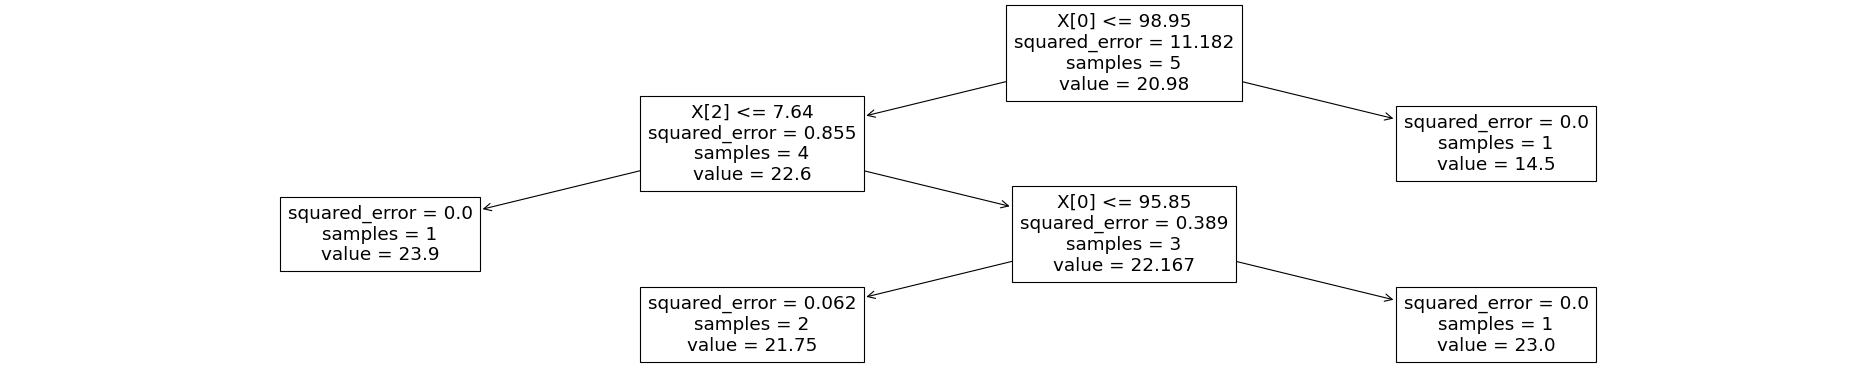

In [9]:
# Create a DecisionTreeRegressor model
tree_depth = 3

DT_Model = DecisionTreeRegressor(max_depth = tree_depth, random_state=1)

# The model is trained on the samples of the training set (features and target variables).
DT_Model.fit(X_train, Y_train)

from sklearn import tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from matplotlib.pyplot import figure

figure(figsize=(30, 6), dpi=80)
# The tree_model produced by DecisionTreeClassifier can be vizualized with tree.plot_tree
tree.plot_tree(DT_Model)

plt.show()